In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from langgraph.checkpoint.memory import InMemorySaver
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
llm = HuggingFaceEndpoint(
    repo_id="NousResearch/Hermes-4-405B",
    task="text-generation"
)
model = ChatHuggingFace(llm=llm)

/Users/anshugangwar/Desktop/Anshu/LangGraph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
class JokeState(TypedDict):

    topic:  str
    joke: str
    explanation: str

In [7]:
def generate_joke(state: JokeState):
    prompt = f'generate a joke on the topic {state['topic']}'
    response = model.invoke(prompt).content

    return {'joke': response}

In [9]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state['joke']}'
    response = model.invoke(prompt).content

    return {'explanation': response}

In [11]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)


graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

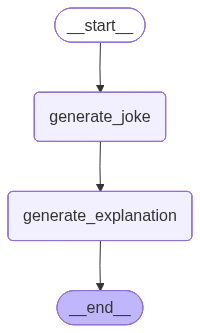

In [12]:
workflow

In [13]:
config1 = {"configurable": {"thread_id":"1"}}
workflow.invoke({'topic': 'pizzza'}, config=config1)

{'topic': 'pizzza',
 'joke': "Why don't scientists trust atoms when ordering pizza?\n\nBecause they make up everything, including the toppings!",
 'explanation': 'The joke is a play on words that relies on two different meanings of the phrase "make up":\n\n1) In science, atoms are the basic building blocks of matter. They "make up" or constitute all physical objects, including the ingredients of a pizza like dough, sauce, cheese, and toppings.\n\n2) To "make up" something can also mean to invent or fabricate it, rather than telling the truth. \n\nSo when the joke asks why scientists don\'t trust atoms when ordering pizza, the punny answer is that atoms "make up everything" on the pizza. For a scientist, this has a double meaning - the atoms literally make up the pizza toppings, but it sounds like the atoms are also making up or lying about what\'s on the pizza.\n\nThe joke plays on this double meaning for humorous effect, imagining atoms almost as little tricksters trying to deceive sc

In [18]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizzza', 'joke': "Why don't scientists trust atoms when ordering pizza?\n\nBecause they make up everything, including the toppings!", 'explanation': 'The joke is a play on words that relies on two different meanings of the phrase "make up":\n\n1) In science, atoms are the basic building blocks of matter. They "make up" or constitute all physical objects, including the ingredients of a pizza like dough, sauce, cheese, and toppings.\n\n2) To "make up" something can also mean to invent or fabricate it, rather than telling the truth. \n\nSo when the joke asks why scientists don\'t trust atoms when ordering pizza, the punny answer is that atoms "make up everything" on the pizza. For a scientist, this has a double meaning - the atoms literally make up the pizza toppings, but it sounds like the atoms are also making up or lying about what\'s on the pizza.\n\nThe joke plays on this double meaning for humorous effect, imagining atoms almost as little tricksters t

In [19]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizzza', 'joke': "Why don't scientists trust atoms when ordering pizza?\n\nBecause they make up everything, including the toppings!", 'explanation': 'The joke is a play on words that relies on two different meanings of the phrase "make up":\n\n1) In science, atoms are the basic building blocks of matter. They "make up" or constitute all physical objects, including the ingredients of a pizza like dough, sauce, cheese, and toppings.\n\n2) To "make up" something can also mean to invent or fabricate it, rather than telling the truth. \n\nSo when the joke asks why scientists don\'t trust atoms when ordering pizza, the punny answer is that atoms "make up everything" on the pizza. For a scientist, this has a double meaning - the atoms literally make up the pizza toppings, but it sounds like the atoms are also making up or lying about what\'s on the pizza.\n\nThe joke plays on this double meaning for humorous effect, imagining atoms almost as little tricksters 

In [21]:
config2 = {'configurable': {'thread_id': "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the pasta go to the gym? Because it wanted to get a little more "al dente"!',
 'explanation': 'The joke "Why did the pasta go to the gym? Because it wanted to get a little more \'al dente\'!" is a play on words that combines two unrelated concepts: going to the gym and the cooking term "al dente."\n\n1. Going to the gym: People usually go to the gym to exercise, build muscle, and improve their fitness. This often involves lifting weights or doing other strength-training exercises.\n\n2. "Al dente": This is an Italian phrase that literally means "to the tooth." It is used to describe the ideal texture of cooked pasta, which should be firm and slightly chewy, not too soft or mushy.\n\nThe joke humorously suggests that the pasta went to the gym to become firmer and more "al dente." This is a pun that connects the idea of building muscle at the gym with the desired texture of properly cooked pasta. The humor lies in the absurdity of pasta going to the g

In [23]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to the gym? Because it wanted to get a little more "al dente"!', 'explanation': 'The joke "Why did the pasta go to the gym? Because it wanted to get a little more \'al dente\'!" is a play on words that combines two unrelated concepts: going to the gym and the cooking term "al dente."\n\n1. Going to the gym: People usually go to the gym to exercise, build muscle, and improve their fitness. This often involves lifting weights or doing other strength-training exercises.\n\n2. "Al dente": This is an Italian phrase that literally means "to the tooth." It is used to describe the ideal texture of cooked pasta, which should be firm and slightly chewy, not too soft or mushy.\n\nThe joke humorously suggests that the pasta went to the gym to become firmer and more "al dente." This is a pun that connects the idea of building muscle at the gym with the desired texture of properly cooked pasta. The humor lies in the absurdity of 

# Time Travel

In [32]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f08b059-e9de-6be6-8001-6c0caee6c21d"}})

StateSnapshot(values={'topic': 'pizzza', 'joke': "Why don't scientists trust atoms when ordering pizza?\n\nBecause they make up everything, including the toppings!"}, next=('generate_explanation',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f08b059-e9de-6be6-8001-6c0caee6c21d'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-09-06T09:41:10.073217+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08b059-dabf-6dcc-8000-2f35bc0984b4'}}, tasks=(PregelTask(id='2c4183c1-5017-c7c9-0848-144a982838ad', name='generate_explanation', path=('__pregel_pull', 'generate_explanation'), error=None, interrupts=(), state=None, result={'explanation': 'The joke is a play on words that relies on two different meanings of the phrase "make up":\n\n1) In science, atoms are the basic building blocks of matter. They "make up" or constitute all physical objects, including the ingredients of a pizza like dough, sauce, che

In [34]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f08b059-e9de-6be6-8001-6c0caee6c21d"}})

{'topic': 'pizzza',
 'joke': "Why don't scientists trust atoms when ordering pizza?\n\nBecause they make up everything, including the toppings!",
 'explanation': 'This joke is a pun that plays on the dual meaning of the phrase "make up."\n\nIn the scientific sense, "make up" means that atoms are the fundamental building blocks that compose all matter in the universe. Everything, including pizza and its toppings, are ultimately composed of atoms.\n\nHowever, in the everyday sense, "make up" can also mean to fabricate or lie about something. So the joke humorously suggests that atoms can\'t be trusted to tell the truth when ordering pizza, because they have the ability to "make up" or create everything, even the toppings!\n\nThe humor comes from the unexpected connection between the scientific properties of atoms and the idea of atoms being untrustworthy pizza customers. It\'s a clever play on words that requires understanding both the scientific and colloquial meanings of "make up."'}

In [37]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizzza', 'joke': "Why don't scientists trust atoms when ordering pizza?\n\nBecause they make up everything, including the toppings!", 'explanation': 'This joke is a pun that plays on the dual meaning of the phrase "make up."\n\nIn the scientific sense, "make up" means that atoms are the fundamental building blocks that compose all matter in the universe. Everything, including pizza and its toppings, are ultimately composed of atoms.\n\nHowever, in the everyday sense, "make up" can also mean to fabricate or lie about something. So the joke humorously suggests that atoms can\'t be trusted to tell the truth when ordering pizza, because they have the ability to "make up" or create everything, even the toppings!\n\nThe humor comes from the unexpected connection between the scientific properties of atoms and the idea of atoms being untrustworthy pizza customers. It\'s a clever play on words that requires understanding both the scientific and colloquial meanin

Updating state

In [39]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id":'1f08b059-dabf-6dcc-8000-2f35bc0984b4', "checkpoint_ns": ""}},{'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f08bb42-5035-6e1a-8001-6c1b66205899'}}

In [40]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08bb42-5035-6e1a-8001-6c1b66205899'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-09-07T06:30:27.983697+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08b059-dabf-6dcc-8000-2f35bc0984b4'}}, tasks=(PregelTask(id='88a8da92-f9f0-88c9-3a69-175312c651ff', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizzza', 'joke': "Why don't scientists trust atoms when ordering pizza?\n\nBecause they make up everything, including the toppings!", 'explanation': 'This joke is a pun that plays on the dual meaning of the phrase "make up."\n\nIn the scientific sense, "make up" means that atoms are the fundamental building blocks that compose all matter in the 

In [41]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id":"1f08bb42-5035-6e1a-8001-6c1b66205899"}})

{'topic': 'samosa',
 'joke': 'Why did the samosa go to therapy? Because it had too many deep-seated issues!',
 'explanation': 'The joke you provided is a play on words that relies on two different meanings of the phrase "deep-seated."\n\n1. In the context of food, "deep-seated" can refer to the filling inside a samosa, which is a savory pastry common in South Asian cuisine. The filling is tucked or "seated" deep within the pastry.\n\n2. In the context of therapy or psychology, "deep-seated issues" refer to emotional problems or traumas that are firmly established and difficult to resolve. These issues are often rooted in a person\'s past experiences.\n\nThe joke creates humor by combining these two meanings. The samosa, a food with a deep-seated filling, goes to therapy because it has "deep-seated issues." This play on words creates a humorous image of an inanimate food item requiring psychological help due to its physical characteristics.\n\nThe joke also relies on anthropomorphizing 

In [42]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa go to therapy? Because it had too many deep-seated issues!', 'explanation': 'The joke you provided is a play on words that relies on two different meanings of the phrase "deep-seated."\n\n1. In the context of food, "deep-seated" can refer to the filling inside a samosa, which is a savory pastry common in South Asian cuisine. The filling is tucked or "seated" deep within the pastry.\n\n2. In the context of therapy or psychology, "deep-seated issues" refer to emotional problems or traumas that are firmly established and difficult to resolve. These issues are often rooted in a person\'s past experiences.\n\nThe joke creates humor by combining these two meanings. The samosa, a food with a deep-seated filling, goes to therapy because it has "deep-seated issues." This play on words creates a humorous image of an inanimate food item requiring psychological help due to its physical characteristics.\n\nThe joke also relies on

# Fault Tolerance

In [60]:
import time

In [61]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [62]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

In [64]:
def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(1000)  # Simulate long-running hang
    return {"step2": "done"}

In [65]:
def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}


In [66]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)


In [67]:

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

In [68]:
checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [69]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
❌ Kernel manually interrupted (crash simulated).


In [70]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")


🔁 Re-running the graph to demonstrate fault tolerance...


In [71]:
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)

⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)


KeyboardInterrupt: 

In [72]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f08bb7d-ce06-691c-8001-e982922da2e3'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-09-07T06:57:04.945575+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f08bb7d-ce04-614e-8000-0ae10e69e7d5'}}, tasks=(PregelTask(id='2649e3ce-14a7-f989-eb96-9aef968c8a29', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step_1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f08bb7d-ce04-614e-8000-0ae10e69e7d5'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-09-07T06:57:04.944556+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'ch